In [1]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import TensorBoard
import time
import matplotlib.pyplot as plt
import cv2



Using TensorFlow backend.


In [2]:
 #importing mnist dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [3]:
print("Training Data is {}".format(x_train[0]))

Training Data is [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 2

In [4]:
print("Testing Data is {}".format(x_test[0]))

Testing Data is [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 24

In [5]:
print("Training label is {}".format(y_train[0:]))

Training label is [5 0 4 ... 5 6 8]


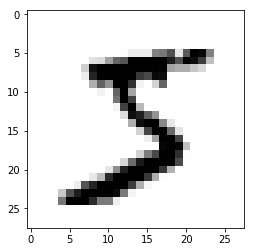

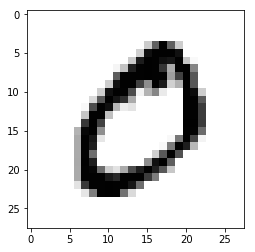

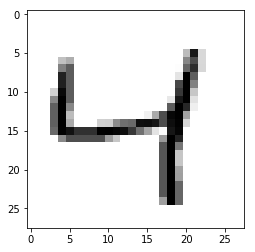

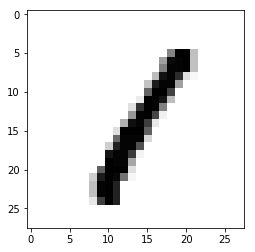

In [6]:
for i in range(0,4):
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.show()

In [7]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)

In [8]:
print("Training Data after normalizing is {}".format(x_train[0]))
print("Testing  Data after normalizing is {}".format(x_test[0]))

Training Data after normalizing is [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.       

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # softmax for probability distribution
model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )

In [10]:
model.fit(x_train,y_train,epochs = 4 )
predictions = model.predict([x_test])

Epoch 1/4
60000/60000 [==============================] - 9s 143us/step - loss: 0.2612 - acc: 0.9249
Epoch 2/4
60000/60000 [==============================] - 6s 108us/step - loss: 0.1059 - acc: 0.9674
Epoch 3/4
60000/60000 [==============================] - 7s 110us/step - loss: 0.0724 - acc: 0.9771
Epoch 4/4
60000/60000 [==============================] - 7s 109us/step - loss: 0.0537 - acc: 0.9826


In [11]:
print("Probability distribution for a multi-class classification")
predictions[4]

Probability distribution for a multi-class classification


array([1.7373277e-06, 1.1927220e-06, 3.5335393e-05, 3.0262152e-05,
       9.9478769e-01, 5.4910305e-07, 9.2770119e-07, 4.6880127e-06,
       3.2532382e-05, 5.1049441e-03], dtype=float32)

In [12]:
print(np.argmax(predictions[4]))

4


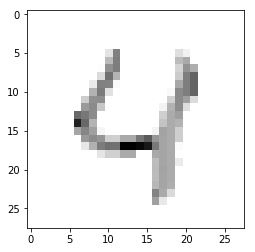

In [13]:
plt.imshow(x_test[4], cmap = plt.cm.binary)
plt.show()

In [14]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 40us/step
0.08615421850518323 0.9738


Saved to capture.jpg


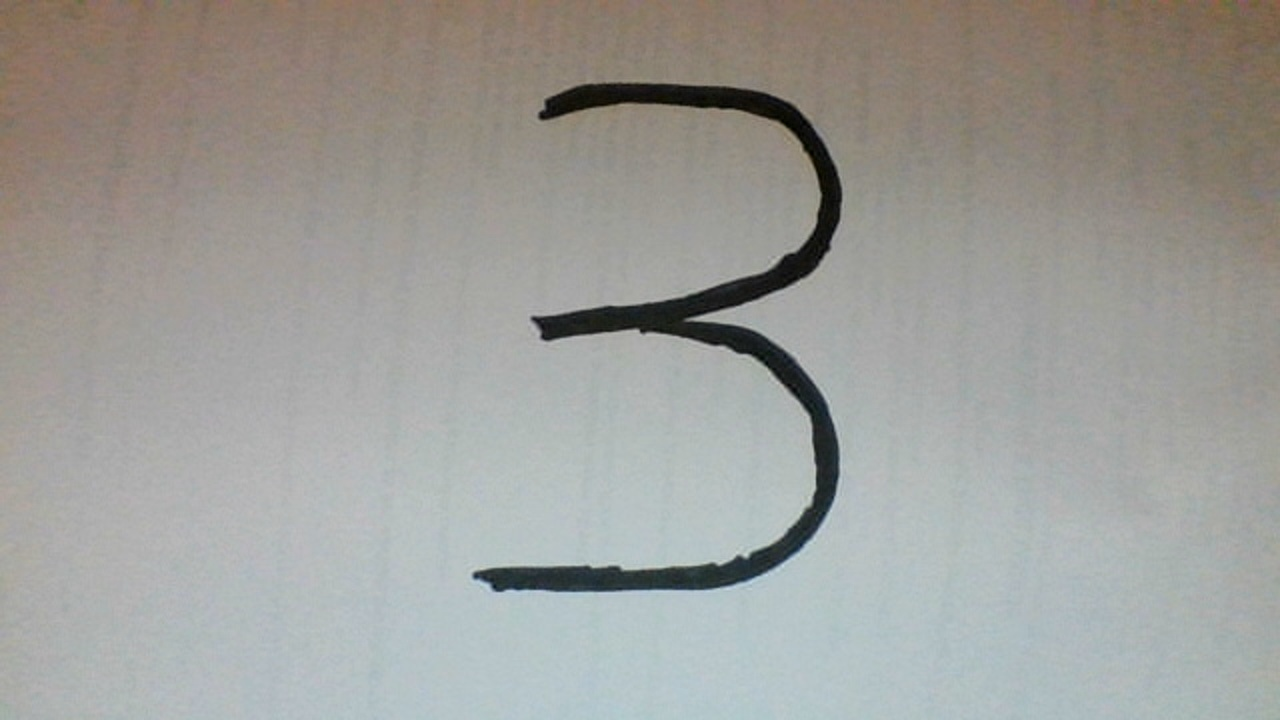

In [19]:
#capture image to identify
cap = cv2.VideoCapture(0)

#set a standard resolution
def make_720p():
    cap.set(3,1200)
    cap.set(4,640)

make_720p()



while(True):
    ret, frame = cap.read()
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2BGRA)

    cv2.imshow('show image and press q to capture image and exit', rgb)
    if cv2.waitKey(1) & 0xFF == ord(' '):
        out = cv2.imwrite('capture.jpg', frame)
        break

cap.release()
cv2.destroyAllWindows()

from IPython.display import Image
try:
  filename = 'capture.jpg'
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))



921600


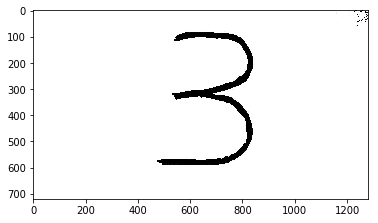

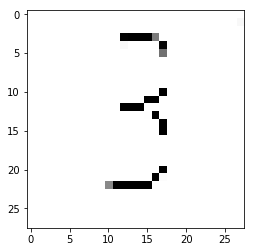

Probability Distribution for 0 9.135505e-05
Probability Distribution for 1 0.0202077
Probability Distribution for 2 0.09956086
Probability Distribution for 3 0.78099966
Probability Distribution for 4 0.005140832
Probability Distribution for 5 0.0059764874
Probability Distribution for 6 0.00079758454
Probability Distribution for 7 0.0024889056
Probability Distribution for 8 0.083555266
Probability Distribution for 9 0.0011813887
The Predicted Value is 3


In [20]:
from PIL import Image
user_test = filename
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
bw.save("bw_image.jpg")
bw
img_array = cv2.imread("bw_image.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()
user_test = tf.keras.utils.normalize(new_array, axis = 1)
predicted = model.predict([[user_test]])
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)
print("The Predicted Value is",np.argmax(predicted[0]))


#speak out the predicted value
import pyttsx3
engine = pyttsx3.init()

choices = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7',8:'8',9:'9'}
result = choices.get(np.argmax(predicted[0]))

engine.say('the predicted value is')
engine.say(result)

engine.runAndWait()